In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("/home/csl-4/Downloads/Social_Network_Ads.csv")

In [4]:
df = pd.read_csv("/home/csl-4/Downloads/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [28]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
X = dataset.iloc[:, [2, 3]].values   # Age, EstimatedSalary
y = dataset.iloc[:, 4].values        # Purchased

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred = classifier.predict(X_test)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [15]:
X_set, y_set = X_train, y_train

x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x1_min, x1_max, 0.01),
    np.arange(x2_min, x2_max, 0.01)
)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

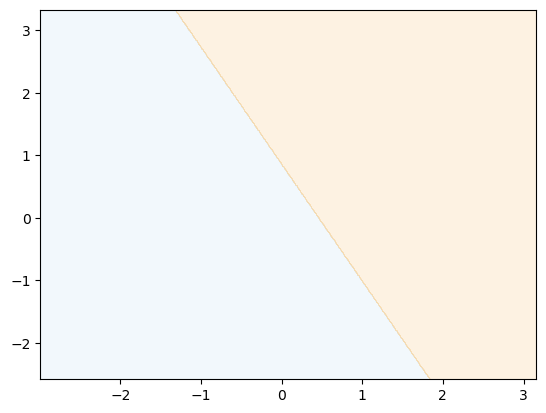

In [16]:
# Softer background colors
plt.contourf(
    xx, yy, Z,
    alpha=0.3,
    cmap=ListedColormap(('#D6EAF8', '#FAD7A0'))
)

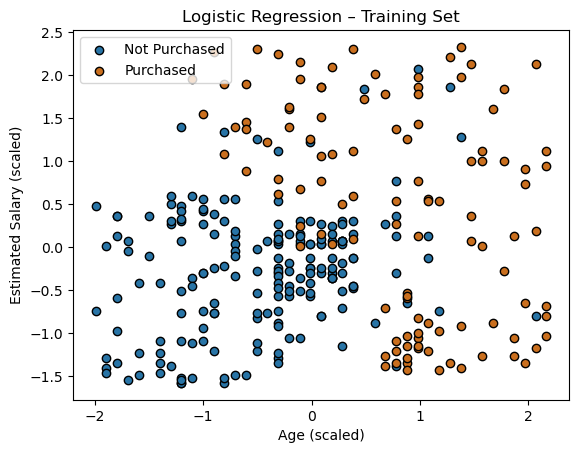

In [17]:
plt.scatter(
    X_set[y_set == 0, 0], X_set[y_set == 0, 1],
    color='#2874A6', label='Not Purchased', edgecolor='k'
)
plt.scatter(
    X_set[y_set == 1, 0], X_set[y_set == 1, 1],
    color='#CA6F1E', label='Purchased', edgecolor='k'
)

plt.title('Logistic Regression – Training Set')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()

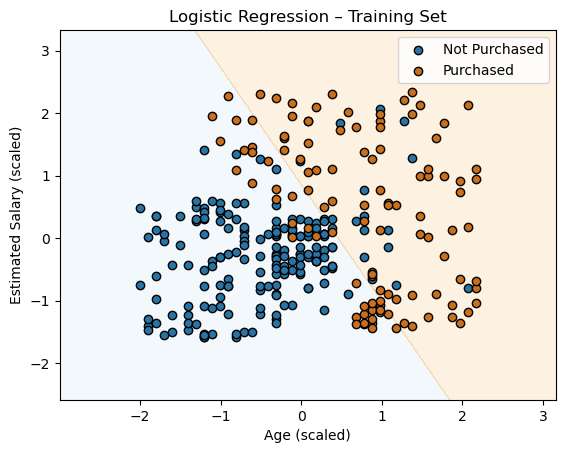

In [18]:
plt.contourf(
    xx, yy, Z,
    alpha=0.3,
    cmap=ListedColormap(('#D6EAF8', '#FAD7A0'))
)

# Data points
plt.scatter(
    X_set[y_set == 0, 0], X_set[y_set == 0, 1],
    color='#2874A6', label='Not Purchased', edgecolor='k'
)
plt.scatter(
    X_set[y_set == 1, 0], X_set[y_set == 1, 1],
    color='#CA6F1E', label='Purchased', edgecolor='k'
)

plt.title('Logistic Regression – Training Set')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()

In [19]:
# TEST SET VISUALIZATION

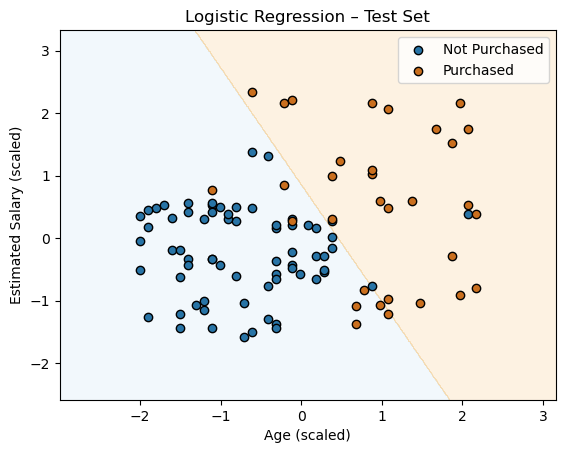

In [20]:
X_set, y_set = X_test, y_test

x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x1_min, x1_max, 0.01),
    np.arange(x2_min, x2_max, 0.01)
)

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(
    xx, yy, Z,
    alpha=0.3,
    cmap=ListedColormap(('#D6EAF8', '#FAD7A0'))
)

plt.scatter(
    X_set[y_set == 0, 0], X_set[y_set == 0, 1],
    color='#2874A6', label='Not Purchased', edgecolor='k'
)
plt.scatter(
    X_set[y_set == 1, 0], X_set[y_set == 1, 1],
    color='#CA6F1E', label='Purchased', edgecolor='k'
)

plt.title('Logistic Regression – Test Set')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()

In [21]:
# ----------CONFUSION MATRIX---------

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

In [23]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

TN, FP, FN, TP

(65, 3, 8, 24)

In [25]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = 1 - accuracy
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("True Positive =", TP)
print("False Positive =", FP)
print("True Negative =", TN)
print("False Negative =", FN)

print("Accuracy =", round(accuracy, 2))
print("Error Rate =", round(error_rate, 2))
print("Precision =", round(precision, 2))
print("Recall =", round(recall, 2))


True Positive = 24
False Positive = 3
True Negative = 65
False Negative = 8
Accuracy = 0.89
Error Rate = 0.11
Precision = 0.89
Recall = 0.75


In [26]:
print(f"Accuracy = {accuracy:.2f}")
print(f"Precision = {precision:.2f}")
print(f"Recall = {recall:.2f}")

Accuracy = 0.89
Precision = 0.89
Recall = 0.75
